# Lectura de datos y creación de modelos de ML

## E1: Lectura y escritura de csv

A. Lee el fichero de airport.csv a partir de una ruta relativa o absoluta.

B. Exporta ese fichero en diferentes formatos (json, excel).

C. Crea una función que pueda leer cualquiera de los tres formatos indicándole, al menos, la ruta del fichero.



In [1]:
import pandas as pd
import numpy as np
import

A. Lee el fichero de airport.csv a partir de una ruta relativa o absoluta.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/tidyverse/nycflights13/main/data-raw/airports.csv")
df.head()

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


B. Exporta ese fichero en diferentes formatos (json, excel).


In [7]:
df.to_csv('airports.csv')
df.to_json('airports.json')
df.to_excel('airports.xlsx')

C. Crea una función que pueda leer cualquiera de los tres formatos indicándole, al menos, la ruta del fichero.

In [13]:
def readFile(filename = str):
  extension = filename.split('.')[1]
  df = pd.DataFrame()
  match extension:
    case 'csv':
      df = pd.read_csv(filename)
    case 'json':
      df = pd.read_json(filename)
    case 'xlsx':
      df = pd.read_excel(filename)
    case _:
      print("Extension is incorrent")

  return df

df = readFile('airports.csv')
df.head()
df = readFile('airports.json')
df.head()
df = readFile('airports.xlsx')
df.head()

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York


## E2: Carga de fichero con variable categórica y crear modelo de clasificación.

A. Descarga de la librería sklearn el fichero de datos de load_breast_cancer.

B. Pasa ese fichero a formato dataframe incluyendo el target

C. Crea un modelo de clasificación usando la técnica que prefieras dentro de Sklearn.

D. Evalúa el modelo.

In [35]:
import sklearn.datasets

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import (
  classification_report,
  confusion_matrix
)

from sklearn.linear_model import SGDClassifier, LogisticRegression

A. Descarga de la librería sklearn el fichero de datos de load_breast_cancer.

In [15]:
dataset = sklearn.datasets.load_breast_cancer()

B. Pasa ese fichero a formato dataframe incluyendo el target


In [33]:
df = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
df["target"] = dataset["target"]

print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


C. Crea un modelo de clasificación usando la técnica que prefieras dentro de Sklearn.

In [20]:
# Comprobamos el número de NAs, si hubiera los eliminaríamos.
# Realizar siempre antes de crear un modelo.

df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [22]:
# ¿Están las clases balanceadas? Si no lo estuvieran, deberíamos balancearlas.
# Realizar siempre antes de crear un modelo.

df["target"].value_counts(normalize = True)

1    0.627417
0    0.372583
Name: target, dtype: float64

In [23]:
# Dividir juego de datos en entrenamiento y test
# Realizar siempre antes de crear un modelo.

X = dataset["data"]
y = dataset["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [30]:
# Inicializar modelos

# Regresión logística
clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, y_train)

# Stochastic Gradient Descendant
clf_sgd = SGDClassifier(
    loss='hinge', penalty='l2',
    alpha=1e-3, random_state=42,
    max_iter=5, tol=None)

clf_sgd.fit(X_train, y_train)


# Siempre empezamos con los modelos más básicos y luego vamos probando nuevos algoritmos


SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

D. Evalúa el modelo.

In [40]:
predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions, target_names=dataset["target_names"]))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

Classification report
              precision    recall  f1-score   support

   malignant       1.00      0.96      0.98        54
      benign       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

Confusion matrix
[[52  2]
 [ 0 89]]


In [41]:
predictions = clf_sgd.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions, target_names=dataset["target_names"]))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

Classification report
              precision    recall  f1-score   support

   malignant       0.91      0.89      0.90        54
      benign       0.93      0.94      0.94        89

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Confusion matrix
[[48  6]
 [ 5 84]]



## Resumen del modelo:
Estamos prediciendo la probabilidad de que un cancer ser benigno (1) o maligno (0), variable binaria, a partir de una muestra poblacional (n) de 568 tumores y sus propiedades, codificadas en 30 variables numéricas. No existen NAs en el juego de datos.

Las clases están ligeramente desbalanceadas, con un 63% de tumores benigno y un 37% de tumores malignos, esto podría llevar a que el modelo sesge su aprendizaje a dar falsos positivos (tumores malignos como beningnos).

Hemos entrenado dos modelos de clasificación utilizando dos algoritmos distintos, una Regresión Logística (LR) y un Stochastic Gradient Descendant (SGD), utilizando un 75% de training y un 25% de test del juego de datos.

Las métricas del modelo que utilizamos para comparar son el accuracy y el f1-score por categoría. El accuracy de LR es de un 99% y de SGD 92%. Ambos tienen un sesgo a predecir tumores malignos como benignos, prediciendo LR 2 y SGD 6, en cambio LR no predice benigno como malignos, pero SGD si, prediciendo 5.

En conclusión, LR tiene una mejor performance que SGD, teniendo un accuracy total del 99%. Recomendaciones para futuros entrenamientos, balancear la clases y aumentar el tamaño de la muestra.



## E4: Crear modelos de clusterización.

A. Descarga el fichero de datos Wine Recognition Dataset de sklearn.

B. Crear varios modelos de clusterización (K-means, NearestNeighbort, DBSCAN, ...).

C. Evalua los clusters de cada modelo.

D. Visualiza los clusters de cada modelo.

E. Crea modelos de clasificación a partir de los clusters.

In [82]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.metrics import (
    adjusted_mutual_info_score,
    homogeneity_score,
    completeness_score,
    silhouette_score,
    v_measure_score,
    adjusted_rand_score
)

A. Descarga el fichero de datos Wine Recognition Dataset de sklearn.

In [56]:
dataset = sklearn.datasets.load_wine()

df = pd.DataFrame(data = dataset['data'], columns = dataset['feature_names'])
df["target"] = dataset["target"]

# Dataset shape
print(df.shape)

# Variables
print(df.head())

# NAs
print(df.isna().sum())

(178, 14)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0

B. Crear varios modelos de clusterización (K-means, NearestNeighbort, DBSCAN, ...).


In [95]:
X = df.iloc[:,0:12]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

kms = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_train)
dbs = DBSCAN(eps=3, min_samples=2).fit(X_train)
afp = AffinityPropagation(random_state=5).fit(X_train)


C. Evalua los clusters de cada modelo.


In [96]:
labels = kms.labels_
print(labels)

prediction_train = kms.predict(X_train)
prediction_test = kms.predict(X_test)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)
print(f"Homogeneity: {homogeneity_score(y_train, labels):.3f}")
print(f"Completeness: {completeness_score(y_train, labels):.3f}")
print(f"V-measure: {v_measure_score(y_train, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(y_train, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X_train, labels):.3f}")

[2 0 0 2 2 0 0 1 2 1 2 0 0 1 2 1 1 0 2 2 1 2 1 2 1 0 1 2 1 1 1 2 2 2 2 2 2
 0 0 0 0 2 2 2 0 2 2 0 2 2 0 1 0 0 0 0 2 2 2 2 0 2 0 0 1 1 2 1 2 0 2 2 2 0
 1 2 0 0 2 2 0 2 0 2 2 1 2 2 2 2 1 0 2 0 2 2 0 0 2 0 0 0 0 2 0 2 1 1 2 2 1
 2 2 2 1 0 2 0 2 1 2 1 0 1 2 0 0 0 1 0 0 0 2]
Estimated number of clusters: 3
Homogeneity: 0.183
Completeness: 0.185
V-measure: 0.184
Adjusted Rand Index: 0.179
Adjusted Mutual Information: 0.172
Silhouette Coefficient: 0.436


In [97]:
labels = dbs.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Homogeneity: {homogeneity_score(y_train, labels):.3f}")
print(f"Completeness: {completeness_score(y_train, labels):.3f}")
print(f"V-measure: {v_measure_score(y_train, labels):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(y_train, labels):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X_train, labels):.3f}")

[ 0  1  2  3  4 -1 -1 -1  4  5  4  2  2 -1  6 -1  7  2  4  6 -1 -1  8  6
  7 -1 -1  6  5 -1 -1  4 -1 -1  9  4  4  2  2 -1 10 11 -1  6 -1 11 -1 -1
  6  4 12  5  2  4  2  2  6  0  4 -1  2  0 -1 10  7 -1  1 -1  9  2 -1  6
 -1 -1  7  6  2  2 -1  4  2  4  2 -1  6  5  6  0  4  6 -1 -1  6 13  8  4
 -1 13  3 12 -1  2  2 11 10  6 14 -1  4  6 15  0 -1 -1 -1 10 -1  2  6 -1
  6 14  2 -1  6 -1 12  2 15  2 -1  2  4]
Estimated number of clusters: 16
Estimated number of noise points: 40
Homogeneity: 0.488
Completeness: 0.231
V-measure: 0.313
Adjusted Rand Index: 0.105
Adjusted Mutual Information: 0.247
Silhouette Coefficient: -0.004


In [102]:
labels_afp = afp.labels_
print(labels_afp)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_afp)) - (1 if -1 in labels_afp else 0)
n_noise_ = list(labels_afp).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Homogeneity: {homogeneity_score(y_train, labels_afp):.3f}")
print(f"Completeness: {completeness_score(y_train, labels_afp):.3f}")
print(f"V-measure: {v_measure_score(y_train, labels_afp):.3f}")
print(f"Adjusted Rand Index: {adjusted_rand_score(y_train, labels_afp):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {adjusted_mutual_info_score(y_train, labels_afp):.3f}"
)
print(f"Silhouette Coefficient: {silhouette_score(X_train, labels_afp):.3f}")

[6 1 2 1 1 3 3 4 8 4 1 2 2 0 6 0 4 2 1 8 0 6 4 6 0 2 0 8 4 0 4 1 6 8 3 1 1
 2 2 9 3 1 8 6 9 1 3 9 8 1 9 4 2 1 2 2 8 8 1 6 2 4 2 3 0 0 1 0 3 2 3 8 8 2
 0 6 2 2 8 1 2 1 2 3 6 4 8 4 1 6 5 2 6 2 4 1 9 2 1 9 9 2 2 1 3 6 0 0 1 8 0
 4 4 6 7 3 3 2 8 7 8 0 2 7 8 2 9 2 4 2 9 2 1]
Estimated number of clusters: 10
Estimated number of noise points: 0
Homogeneity: 0.475
Completeness: 0.239
V-measure: 0.318
Adjusted Rand Index: 0.204
Adjusted Mutual Information: 0.284
Silhouette Coefficient: 0.283


D. Visualiza los clusters de cada modelo.

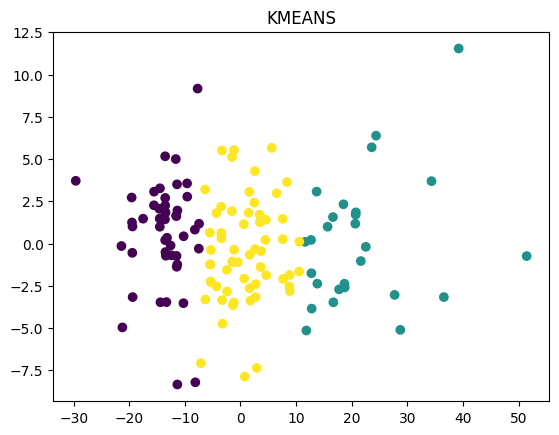

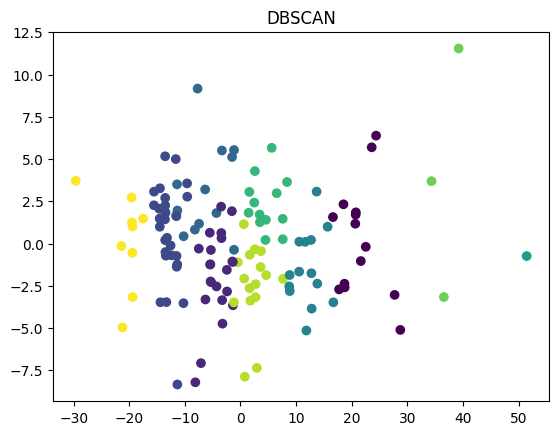

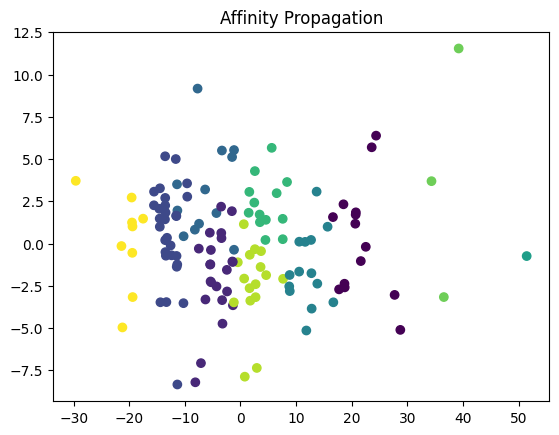

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducimos la dimensionalidad a dos dimensiones para poder visualizar los clusters
pca = PCA(n_components=2)
PCA_dim = pca.fit_transform(X_train)

pca_df = pd.DataFrame(
    data = PCA_dim,
    columns = ['PC1', 'PC2'])

plt.scatter(
  pca_df['PC1'],
  pca_df['PC2'],
  c=prediction_train
)

plt.title(f"KMEANS")
plt.show()

plt.scatter(
  pca_df['PC1'],
  pca_df['PC2'],
  c=labels
)

plt.title(f"DBSCAN")
plt.show()

plt.scatter(
  pca_df['PC1'],
  pca_df['PC2'],
  c=labels
)

plt.title(f"Affinity Propagation")
plt.show()


E. Crea modelos de clasificación a partir de los clusters.

In [99]:
clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, prediction_train)

predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions, target_names=dataset["target_names"]))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))

Classification report
              precision    recall  f1-score   support

     class_0       0.06      0.09      0.07        11
     class_1       0.30      0.21      0.25        14
     class_2       0.37      0.35      0.36        20

    accuracy                           0.24        45
   macro avg       0.24      0.22      0.23        45
weighted avg       0.27      0.24      0.26        45

Confusion matrix
[[1 3 7]
 [6 3 5]
 [9 4 7]]



## Resumen del modelo:
Hemos creado tres modelos de clusterización, Kmeans, DBSCAN y Affinity Propagation para agrupar de vinos a partir de características físico-químicas. El juego de datos tiene una muestra (n) de 178 y variables 13 númericas, más una categórica con tres categorías.

Hemos evaluado los tres modelos clusterización, al ser algoritmos de aprendizaje no supervisado, es necesario conocer su comportamiento a partir de la experiencia de los datos y de los algoritmos para realizar una buena elección del algoritmo. Para ello hemos calculado distintas métricas para conocer sus comportamientos y hemos visualizado los resultados a partir de dos primeros componentes principales al reducir la dimensionalidad.

Hemos construido un modelo de clasificación a partir de los resultados del algortimo Kmeans que parece ser, a primera vista el mejor, aunque no hemos dedicado tiempo a explorar el fine tuning de los otros dos modelos de clusterización. El modelo de clasificación nos da un accuracy del 24% al comparar contra los datos reals de la variable target.





 ## Creación de un juego de datos sintéticos a partir de distribuciones estadísticas

El juego de datos se compondrá de las siguientes variables:

- Sexo: Categórica
- Peso: Numérica
- Estatura: Numérica
- BMI: Numérica

Suposiciones:

- El 49,0% del total de inscritos en el Padrón son hombres y el 51,0% mujeres.
- La estatura de los hombre sigue una distribución media de 179.3 y una desviación típica 7.0.
- La estatura de las mujeres sigue una distribución media de 176.3 y una desviación típica 6.6.
- El peso de los hombre sigue una distribución media de 78.9 y una desviación típica 11.8.
- El peso de las mujeres sigue una distribución media de 60.4 y una desviación típica 9.7.
- BMI = Peso / (Estatura/100)^2

Tareas:

A. Crea 100.000 individuos y sus variables.

B. Clusteriza sus BMIs y explora si existe una relación con:
- Bajo peso = menos de 18.5.
- Peso normal = 18.5–24.9.
- Sobrepeso = 25–29.9.
- Obesidad = BMI de 30 ó mayor

C. Crea un modelo de regresión que calcule el BMI.

D. Crea un modelo de clasificación que indique si una persona tiene sobrepeso o no.

A. Crea 100.000 individuos y sus variables.

In [133]:
n = 10000
n_split = 0.51
df_m = pd.DataFrame()

n_m = int(n*(n_split))
df_m['sex'] = [0 for i in range(n_m)]
df_m['weight'] = np.random.normal(60.4, 9.7, n_m)
df_m['height'] = np.random.normal(176.3, 6.6, n_m)
df_m['BMI'] = round(df_m['weight'] / (df_m['height']/100)**2, 1)
print(df_m.head())

df_h = pd.DataFrame()
n_m = int(n*(1-n_split))
df_h['sex'] = [1 for i in range(n_m)]
df_h['weight'] = np.random.normal(78.9, 11.8, n_m)
df_h['height'] = np.random.normal(179.3, 7.0, n_m)
df_h['BMI'] = round(df_h['weight'] / (df_h['height']/100)**2, 1)
print(df_h.head())

df = pd.concat([df_h, df_m], ignore_index=True).sample(frac = 1)
print(df.head())
print(df.shape)

   sex     weight      height   BMI
0    0  56.191917  180.482213  17.3
1    0  45.548215  170.205311  15.7
2    0  71.246523  177.196628  22.7
3    0  57.628729  172.800607  19.3
4    0  68.008899  174.516003  22.3
   sex     weight      height   BMI
0    1  83.953094  186.223483  24.2
1    1  90.574089  186.312166  26.1
2    1  77.990088  169.892608  27.0
3    1  86.502237  185.435270  25.2
4    1  72.996809  174.319903  24.0
      sex     weight      height   BMI
3090    1  81.089268  181.343063  24.7
1916    1  78.180810  187.093592  22.3
4941    0  37.506865  172.671342  12.6
8781    0  54.978782  164.357821  20.4
681     1  82.781139  173.428907  27.5
(10000, 4)


B. Clusteriza sus BMIs y explora si existe una relación con:
- Bajo peso = menos de 18.5.
- Peso normal = 18.5–24.9.
- Sobrepeso = 25–29.9.
- Obesidad = BMI de 30 ó mayor


[0 3 1 ... 1 2 0]
Estimated number of clusters: 4
Silhouette Coefficient: 0.345
0.14863023825403038


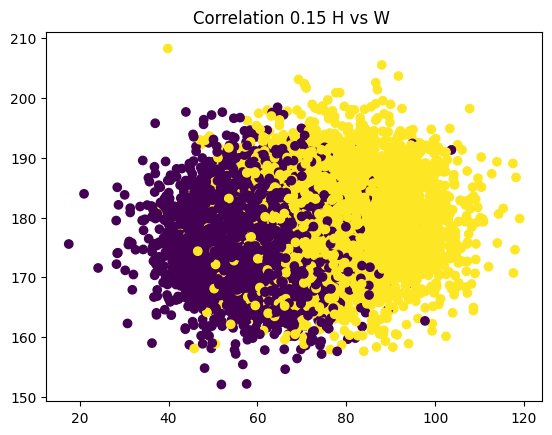

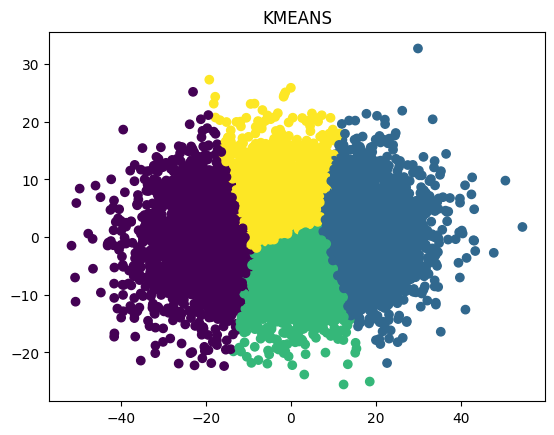

In [139]:

kms = KMeans(n_clusters=4, random_state=0, n_init="auto").fit(df)
labels = kms.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print("Estimated number of clusters: %d" % n_clusters_)
print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

plt.scatter(
  df['weight'],
  df['height'],
  c=df['sex']
)

from scipy.stats import pearsonr
corr, _ = pearsonr(df['weight'], df['height'])
print(corr)

plt.title("Correlation {} H vs W ".format(round(corr,2)))
plt.show()

pca = PCA(n_components=2)
PCA_dim = pca.fit_transform(df)

pca_df = pd.DataFrame(
    data = PCA_dim,
    columns = ['PC1', 'PC2'])

plt.scatter(
  pca_df['PC1'],
  pca_df['PC2'],
  c=labels
)

plt.title(f"KMEANS")
plt.show()

C. Crea un modelo de regresión que calcule el BMI.


Variance explanation R^2 = 0.99
Coefficients: 
 [[ 0.02685518  0.31644719 -0.25031435]]
Mean squared error: 0.13
Coefficient of determination: 0.99


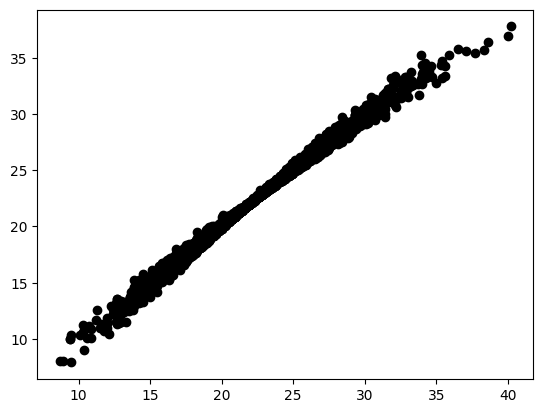

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[['sex','weight','height']]
y = df[['BMI']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

regr = LinearRegression().fit(X_train, y_train)

print("Variance explanation R^2 = {}".format(round(reg.score(X, y),2)))

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(y_test, y_pred, color="black")
# plt.plot(X_test, y_pred, color="blue", linewidth=3)


plt.show()


D. Crea un modelo de clasificación que indique si una persona tiene sobrepeso o no.

In [160]:
df['overweight'] = df.apply(lambda x: 1 if x['BMI'] > 25 else 0, axis=1)

X = df[['sex','weight','height']]
y = df[['overweight']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

clf_log = LogisticRegression(max_iter=10000, tol=0.1)
clf_log.fit(X_train, y_train)

predictions = clf_log.predict(X_test)

print("Classification report")
print(classification_report(y_test, predictions, target_names=['Fit','Overweight']))

print("Confusion matrix")
print(confusion_matrix(y_test, predictions))


Classification report
              precision    recall  f1-score   support

         Fit       1.00      1.00      1.00      2233
  Overweight       0.99      1.00      0.99       767

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

Confusion matrix
[[2228    5]
 [   3  764]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
